In [23]:
%matplotlib inline

In [24]:
print(__doc__)

import matplotlib.pyplot as plt
import sklearn
import random
import tabulate
import numpy as np
from numpy import asarray
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from tabulate import tabulate

Automatically created module for IPython interactive environment


In [25]:
# Load data
iris = datasets.load_iris()

X = iris.data[:, :2] # Features in X
y = iris.target      # Lables in y

In [26]:
# Devide into train and validate at 1:3 ratio
x_val, x_train, y_val, y_train = train_test_split(X, y, test_size=0.3)

In [27]:
ks = [1,5,10,20,30]
nhs = []

for k in ks:
    n = KNeighborsClassifier(n_neighbors=k)
    n.fit(x_train, y_train)
    nhs.append((n, n.predict(x_val), n.score(x_train, y_train), n.score(x_val, y_val)))
    
nhs = asarray(nhs)

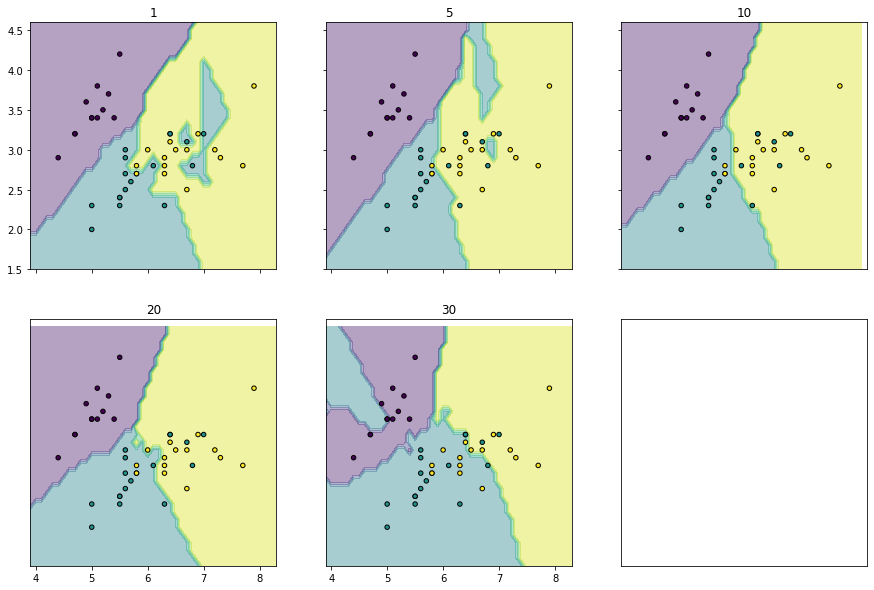

<Figure size 1080x720 with 0 Axes>

In [28]:
# 
x_min, x_max = x_train[:, 0].min() - .5, x_train[:, 0].max() + .5
y_min, y_max = x_train[:, 1].min() - .5, x_train[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
f, axarr = plt.subplots(2, 3, sharex='col', sharey='row', figsize=(15, 10))

for idx, clf, tt in zip(([0,0],[0,1],[0,2],[1,0],[1,1]), nhs[:,0], ks):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.figure(2, figsize=(15, 10))
plt.clf()
plt.show()

In [29]:
headers = ['K', 'Training', 'Validate']
table = zip(ks, nhs[:, 2], nhs[:, 3])
tabelWH = tabulate(table, headers)

print (tabelWH)

  K    Training    Validate
---  ----------  ----------
  1    0.955556    0.733333
  5    0.822222    0.771429
 10    0.844444    0.780952
 20    0.844444    0.8
 30    0.711111    0.771429


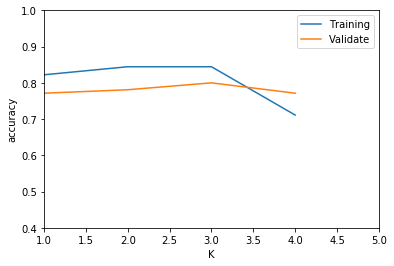

In [34]:
# Plot acc curves:
plt.figure(len(ks))
plt.plot(nhs[:, 2])
plt.plot(nhs[:, 3])
plt.xlim([1,5])
plt.ylim(0.4, 1)
plt.xlabel('K')
plt.ylabel('accuracy')
plt.legend(['Training', 'Validate'], loc='best')